In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
plt.style.use('..\informes.mplstyle')

c_sp_sat = 'C9'  # Color del setpoint y banda de no saturacion
ls_sat = ':'  # Linestyle de la señal saturada

px2d = lambda x: x*(71/595)  # PiXel a Distancia
b2V = lambda x: (x/255)*5  # Bits a Voltaje

descargar = False

Posiciones

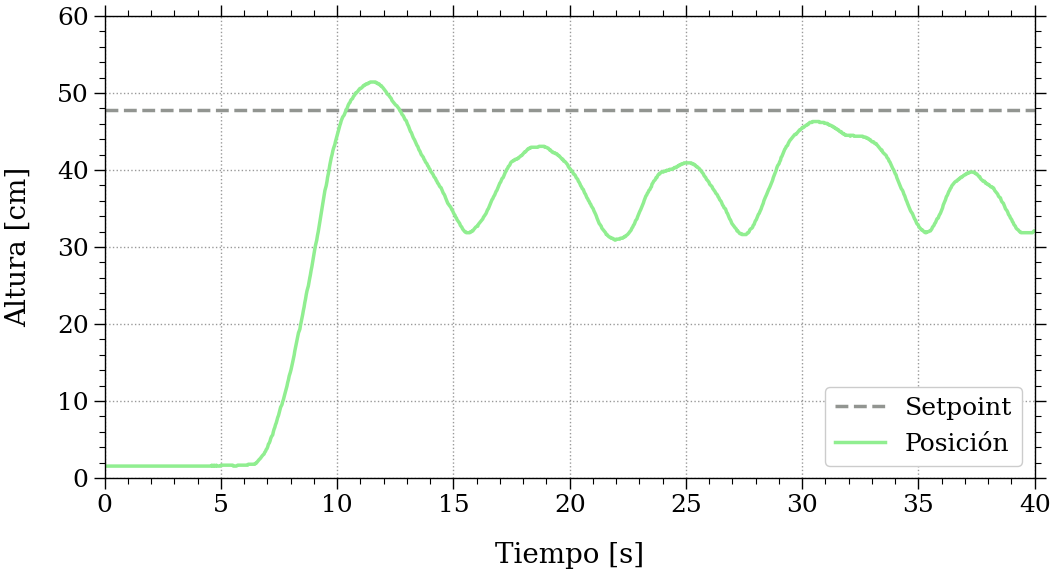

In [2]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0-0-barrido.csv')
df = df[df['Time'] <= 40]
setpoint = df['Setpoint'][0]

t = df['Time'].values + 3.9
t = np.insert(t, 0, 0)
h = px2d(df['Position'].values)
h = np.insert(h, 0, h[0])


# FIGURA Y AXES

fig, ax = plt.subplots()
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Altura [cm]')
ax.set_xlim(0, 40)
ax.set_ylim(0, 60)


# PLOTS

ax.axhline(px2d(setpoint), c=c_sp_sat,
           ls='--', label='Setpoint')
ax.plot(t, h, label='Posición')


ax.legend(loc='lower right')
if descargar:
    fig.savefig('.\Figuras\P-altura')
plt.show()

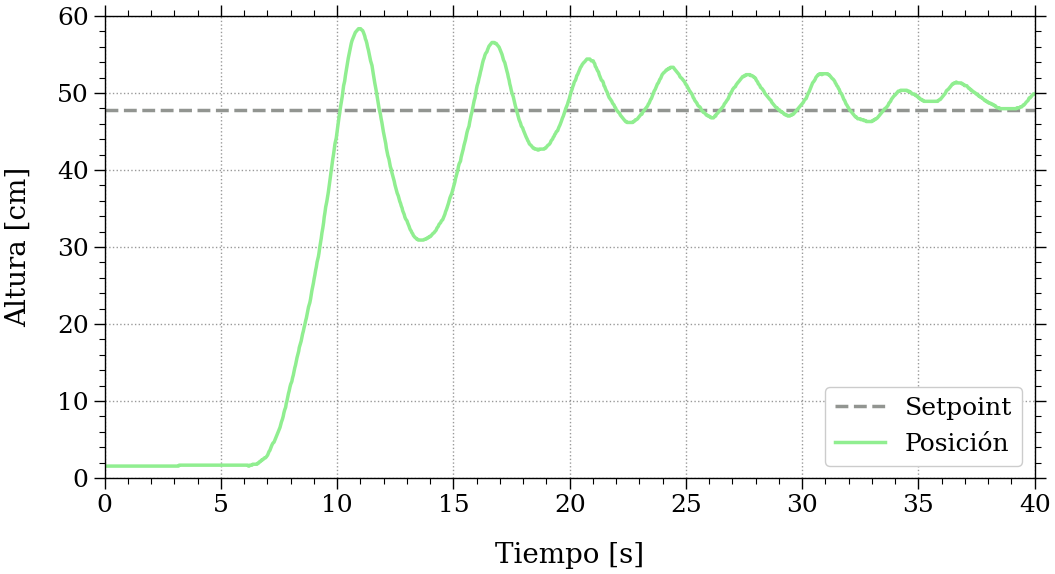

In [3]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0.07-0-barrido.csv')
df = df[df['Time'] <= 40]
setpoint = df['Setpoint'][0]

t = df['Time'].values
h = px2d(df['Position'].values)


# FIGURA Y AXES

fig, ax = plt.subplots()
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Altura [cm]')
ax.set_xlim(0, 40)
ax.set_ylim(0, 60)


# PLOTS

ax.axhline(px2d(setpoint), c=c_sp_sat,
           ls='--', label='Setpoint')
ax.plot(t, h, label='Posición')


ax.legend(loc='lower right')
if descargar:
    fig.savefig('.\Figuras\PI-altura')
plt.show()

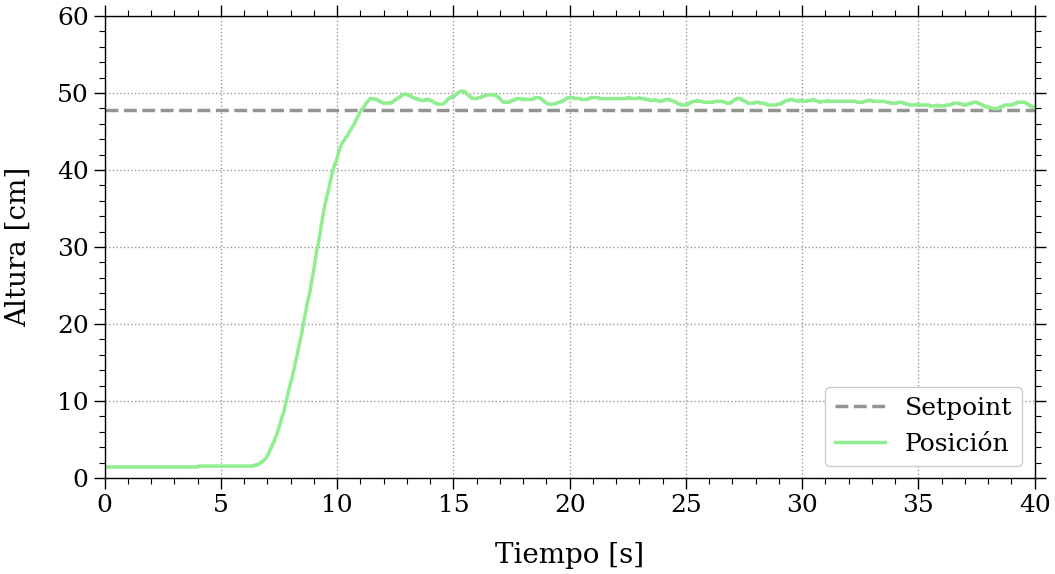

In [4]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0.07-2-barrido.csv')
df = df[df['Time'] <= 40]
setpoint = df['Setpoint'][0]

t = df['Time'].values
h = px2d(df['Position'].values)


# FIGURA Y AXES

fig, ax = plt.subplots()
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Altura [cm]')
ax.set_xlim(0, 40)
ax.set_ylim(0, 60)


# PLOTS

ax.axhline(px2d(setpoint), c=c_sp_sat,
           ls='--', label='Setpoint')
ax.plot(t, h, label='Posición')


ax.legend(loc='lower right')
if descargar:
    fig.savefig('.\Figuras\PID-altura')
plt.show()

Señales de control

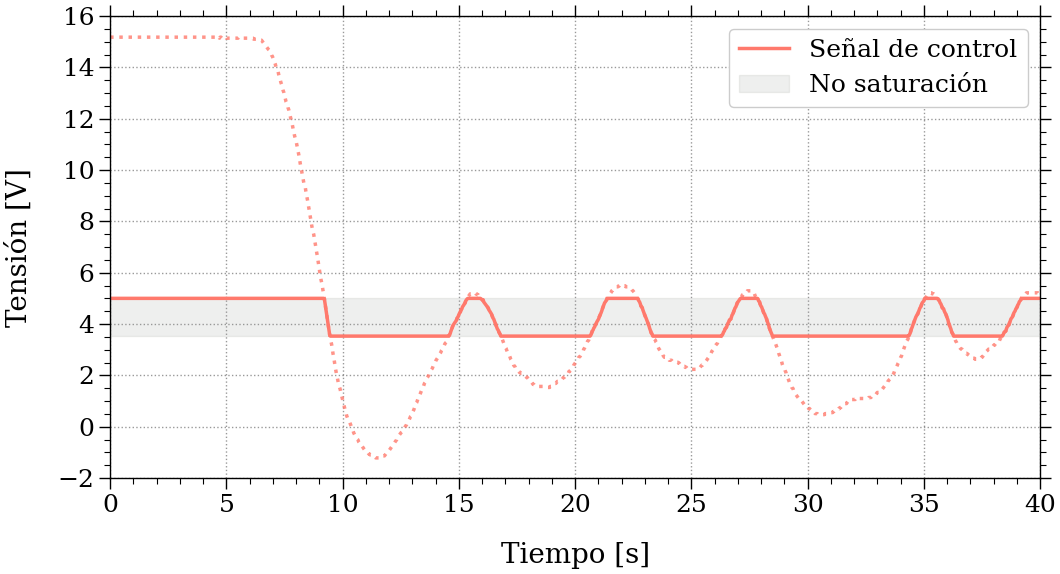

0.5995179698379787 3.5294117647058827


In [5]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0-0-barrido.csv')
df = df[df['Time'] <= (40 - 3.9)]

t = df['Time'].values + 3.9
t = np.insert(t, 0, 0)

P = b2V(df['P'].values)
P = np.insert(P, 0, P[0])


# FIGURA Y AXES

fig, ax = plt.subplots()

ax.set_ylabel('Tensión [V]')
ax.set_xlabel('Tiempo [s]')
ax.set_xlim(0, 40)
ax.set_ylim(-2, 16)


# PLOTS
linewidth = 2
ax.plot(t, P, c='C3', ls=ls_sat, alpha=0.8)
P[P < b2V(180)] = b2V(180)
P[P > 5] = 5
ax.plot(t, P, c='C3', label='Señal de control')
ax.fill_between([0, 45], 2*[b2V(180)], 2*[5], color=c_sp_sat,
                alpha=0.15, label='No saturación')


ax.legend()
if descargar:
    fig.savefig('.\Figuras\P-señal')
plt.show()


peaks = np.array(find_peaks(np.abs(np.diff((P == 5) | (P == b2V(180)))), threshold=0.1)[0])
peaks = np.delete(peaks, 0)
peaks = np.append(peaks, len(t)-1)
t_sat = 0
for i in range(0, len(peaks)-1, 2):
    t_sat += t[peaks[i+1]] - t[peaks[i]]

print(t_sat/t[-1], b2V(180))

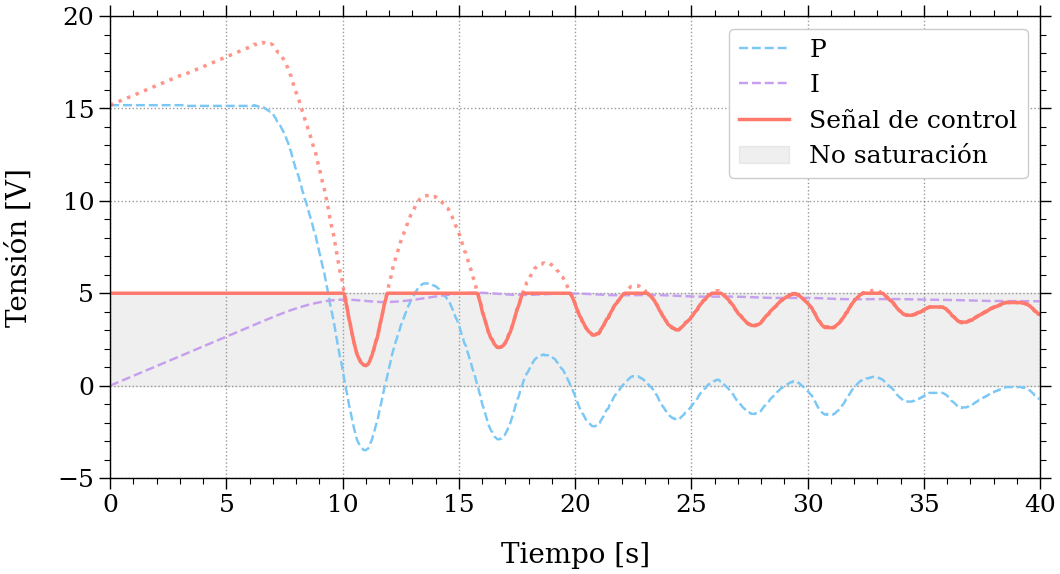

0.20541730676419212


In [6]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0.07-0-barrido.csv')
df = df[df['Time'] <= 40]

t = df['Time'].values
P = b2V(df['P'].values)
I = b2V(df['I'].values)
PI = P + I


# FIGURA Y AXES

fig, ax = plt.subplots()

ax.set_ylabel('Tensión [V]')
ax.set_xlabel('Tiempo [s]')
ax.set_xlim(0, 40)
ax.set_ylim(-5, 20)


# PLOTS
linewidth = 2
# P
ax.plot(t, P, '--', c='C1', label='P',lw=1.75)
# I
ax.plot(t, I, '--', c='C2', label='I',lw=1.75)
# PI
ax.plot(t, PI, c='C3', ls=ls_sat, alpha=0.8)
PI[PI < 0] = 0
PI[PI > 5] = 5
ax.plot(t, PI, c='C3', label='Señal de control')

ax.fill_between([0, 45], 2*[0], 2*[5], color=c_sp_sat,
                   alpha=0.15, label='No saturación')


ax.legend()
if descargar:
    fig.savefig('.\Figuras\PI-señal')
plt.show()


peaks = np.array(find_peaks(np.abs(np.diff((PI == 5) | (PI == 0))), threshold=0.1)[0])
peaks = np.delete(peaks, 0)
t_sat = 0
for i in range(0, len(peaks)-1, 2):
    t_sat += t[peaks[i+1]] - t[peaks[i]]

print(t_sat / t[-1])

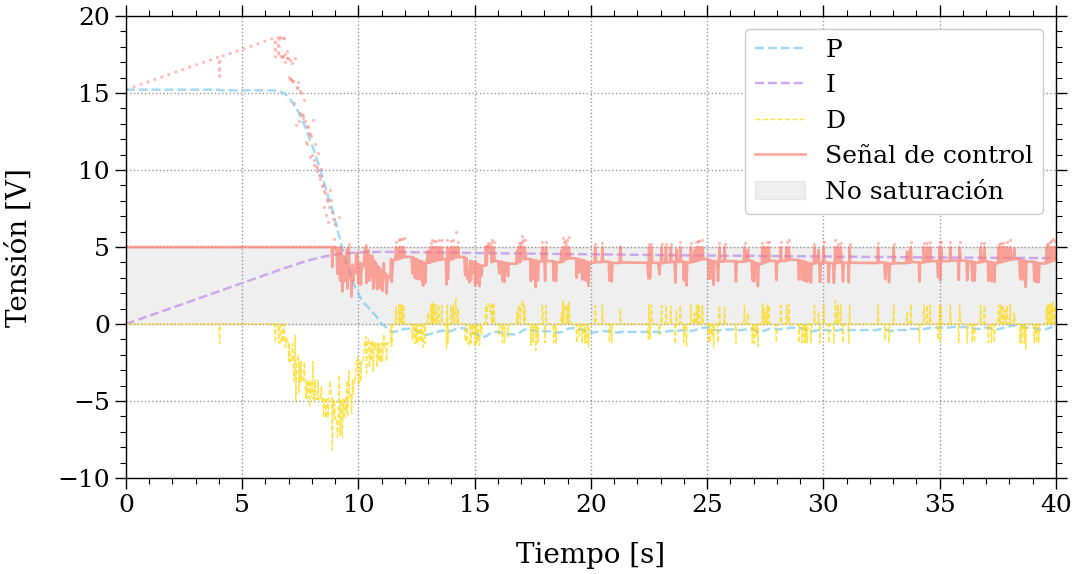

In [7]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0.07-2-barrido.csv')
df = df[df['Time'] <= 40]

t = df['Time'].values
P = b2V(df['P'].values)
I = b2V(df['I'].values)
D = b2V(df['D'].values)
PID = P + I + D


# FIGURA Y AXES

fig, ax = plt.subplots()

ax.set_ylabel('Tensión [V]')
ax.set_xlabel('Tiempo [s]')
ax.set_xlim(0, 40)
ax.set_ylim(-10, 20)


# PLOTS

alpha_sat = 0.5
alpha_no_sat = 0.7
linewidth = 2
# P
ax.plot(t, P, '--', c='C1', label='P', alpha=alpha_no_sat, lw=1.75)
# I
ax.plot(t, I, '--', c='C2', label='I', alpha=alpha_no_sat+.2, lw=1.75)
# D
ax.plot(t, D, '--', c='C4', label='D', alpha=alpha_no_sat, lw=1)
# PID
# Saturado
PID_sat = PID[PID > 5][185:]
t_sat = t[PID > 5][185:]
ax.plot(t[:185], PID[:185], c='C3', ls=ls_sat, alpha=alpha_sat, lw=linewidth)
ax.plot(t_sat, PID_sat, '.', c='C3', markersize=3, alpha=alpha_sat-0.15)
# No saturado
PID[PID < 0] = 0
PID[PID > 5] = 5
ax.plot(t, PID, c='C3', label='Señal de control', alpha=alpha_no_sat-0.03, lw=linewidth-0.1)

ax.fill_between([0, 45], 2*[0], 2*[5], color=c_sp_sat,
                   alpha=0.15, label='No saturación')


ax.legend()
if descargar:
    fig.savefig('.\Figuras\PID-señal')
plt.show()

On - Off

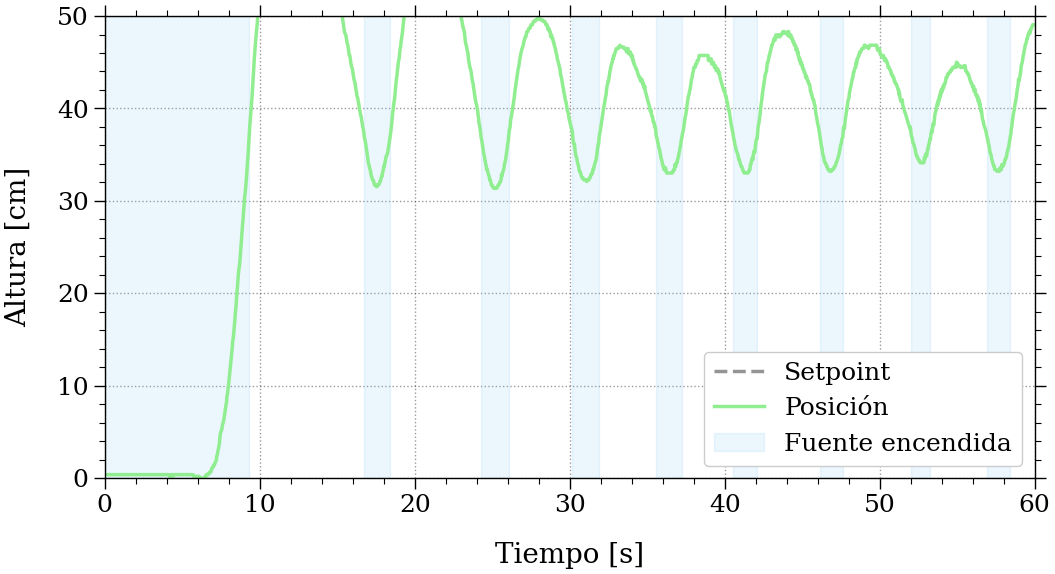

In [8]:
df = pd.read_csv('..\Mediciones\Clase 2\posiciones-onoff2.csv',
                 header=None, names=['Tiempo', 'Posicion', 'On-Off'])

t = df['Tiempo'].values
t -= t[0]
h = df['Posicion'].values
px2d_onoff = lambda x: x * 71/max(h)
h = px2d_onoff(h)
onoff = df['On-Off'].values


# FIGURA Y AXES

fig, ax = plt.subplots()
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Altura [cm]')
ax.set_xlim(0, 60)
ax.set_ylim(0, 50)


# PLOTS Y PEAKS

ax.axhline(px2d_onoff(200), c=c_sp_sat,
           ls='--', label='Setpoint')
ax.plot(t, h, label='Posición')


peaks = find_peaks(np.abs(np.diff(onoff)), threshold=0.5)[0]
peaks = np.insert(peaks, 0, 0)
for i in range(0, len(peaks)-1, 2):
    ax.fill_betweenx([0, 50], t[peaks[i]], t[peaks[i+1]],
                        color='C1', alpha=0.15)
ax.fill_betweenx([0, 50], t[peaks[-1]], t[-1],
                 color='C1', alpha=0.15, label='Fuente encendida')


ax.legend(loc='lower right')
if descargar:
    fig.savefig('.\Figuras\On-off')
plt.show()

Varios Control P

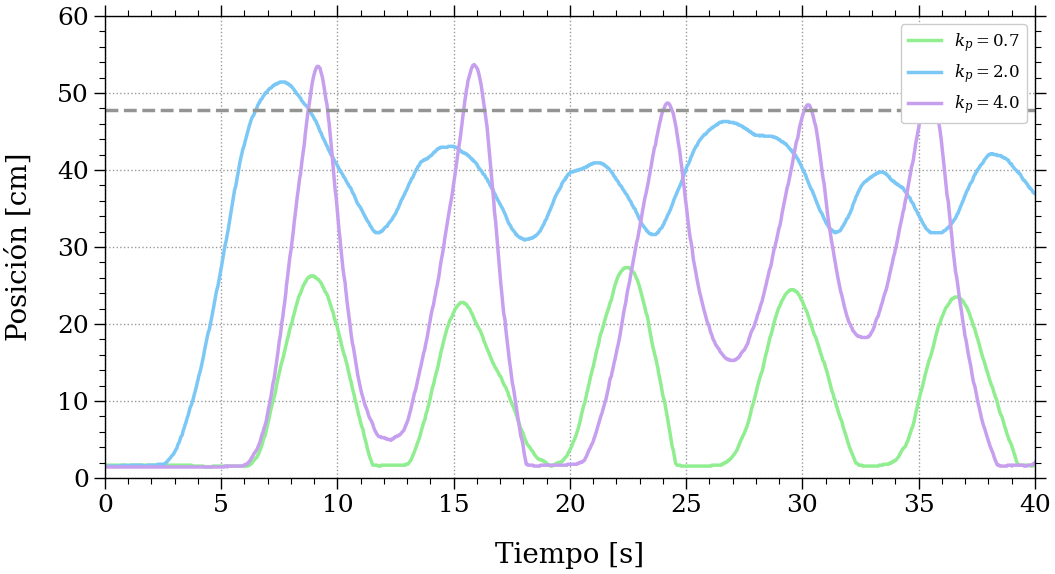

In [9]:
kp_path = [0.7,2,4]
path = [fr'..\Mediciones\Clase 3\PID\PID-{i}-0-0-barrido.csv' for i in kp_path]
# Mediciones\Clase 3\PID\PID-0.7-0-0-barrido.csv
fig, ax = plt.subplots()

t = []
h = []
P = []
I = []
D = []
kp = []
for path in path:
    df = pd.read_csv(path)
    t.append(df['Time'].values)
    h.append(px2d(df['Position'].values))
    P.append(df['P'].values)
    I.append(df['I'].values)
    D.append(df['D'].values)
    kp.append(df['kp'][0])
    # kp = df['kp'][0]
    # kd = df['kd'][0]
    setpoint = px2d(df['Setpoint'][0])

c_s = ['C1', 'C0', 'C2']
for i in range(len(kp_path)):
    ax.plot(t[i],h[i],label = f'$k_p = {kp[i]}$')
ax.hlines(setpoint,t[0][0],t[0][-1],ls = '--',color = 'C9')
ax.set_ylabel('Posición [cm]')
ax.set_xlabel('Tiempo [s]')
ax.set_xlim(0,40)
ax.set_ylim(0,60)
ax.legend(loc = 'upper right',fontsize = 'large')
   

0
1
2


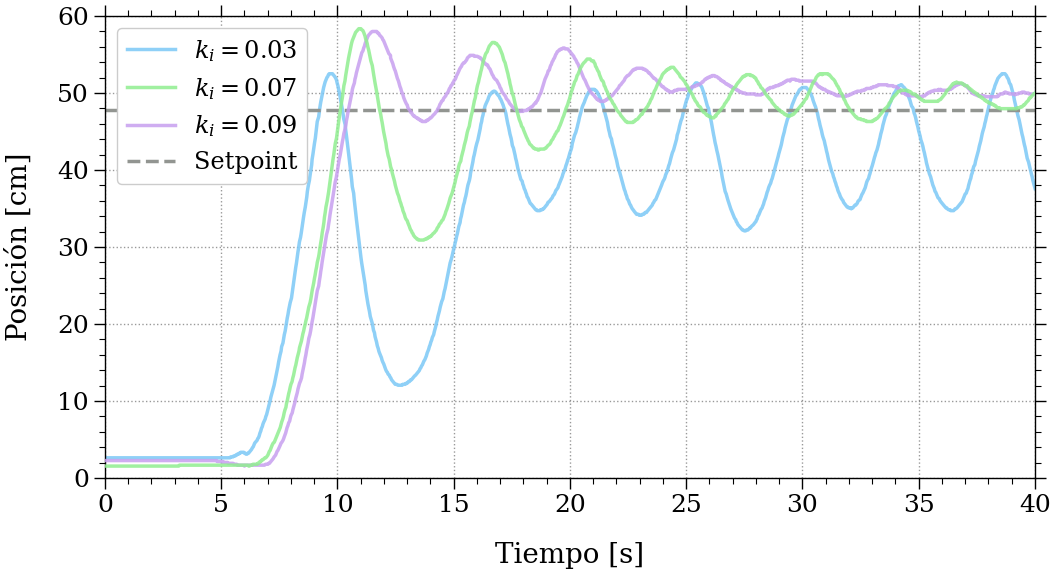

In [67]:
from scipy import signal

ki_path = [0.03,0.07, 0.09]
path = [fr'..\Mediciones\Clase 3\PID\PID-2-{i}-0-barrido.csv' for i in ki_path]
extra_ki = '..\Mediciones\Clase 3\PI\PI-2-01.csv'
# Mediciones\Clase 3\PID\PID-0.7-0-0-barrido.csv
fig, ax = plt.subplots()

t = []
h = []
P = []
I = []
D = []
ki = []
for path in path:
    df = pd.read_csv(path)
    t.append(df['Time'].values)
    h.append(px2d(df['Position'].values))
    P.append(df['P'].values)
    I.append(df['I'].values)
    D.append(df['D'].values)
    kp.append(df['kp'][0])
    ki.append(df['ki'][0])
    # kd = df['kd'][0]
    setpoint = px2d(df['Setpoint'][0])

# df = pd.read_csv(extra_ki)
# t.append(df['Time'].values)
# h_temp = (px2d(df['Position'].values))
# ki.append(df['ki'][0])
# h_savgol = signal.savgol_filter(h_temp,window_length=20, polyorder=3, mode = 'nearest')
# h.append(h_savgol)
c_s = ['C1', 'C0', 'C2']
zorder_s = [2, 4, 3]
for i in range(len(ki_path)):
    print(i)
    ax.plot(t[i],h[i],label = f'$k_i = {ki[i]}$', c=c_s[i], alpha=0.85, zorder=zorder_s[i])
ax.hlines(setpoint,0,40,ls = '--',color = 'C9', label='Setpoint')
ax.set_ylabel('Posición [cm]')
ax.set_xlabel('Tiempo [s]')
ax.set_xlim(0,40)
ax.set_ylim(0,60)
ax.legend(loc = 'upper left',fontsize = 'xx-large')

# fig.savefig('.\Figuras\PI_3')
plt.show()

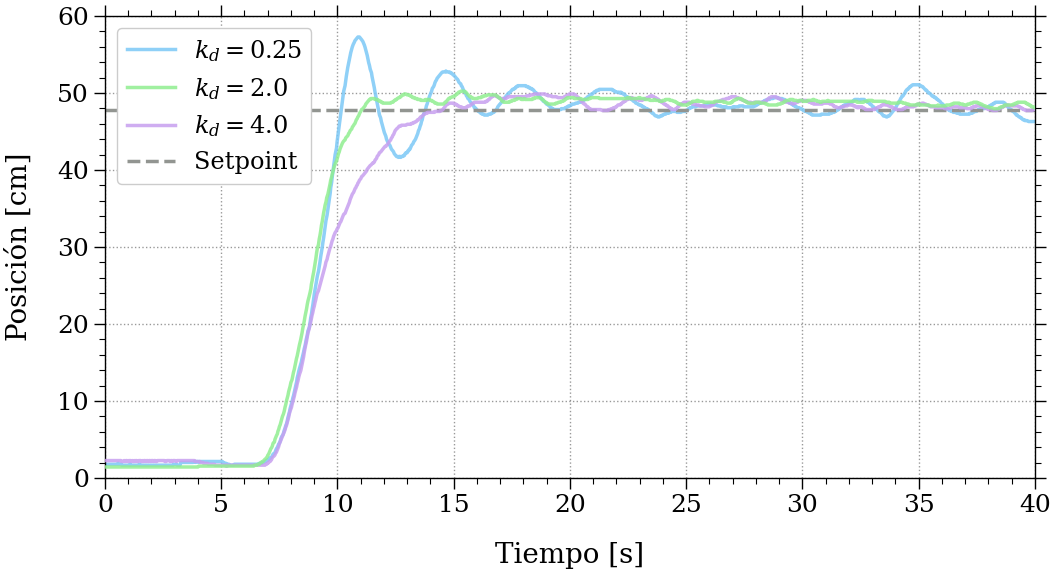

In [63]:
kd_path = [0.25,2,4]
path = [fr'..\Mediciones\Clase 3\PID\PID-2-0.07-{i}-barrido.csv' for i in kd_path]
# Mediciones\Clase 3\PID\PID-0.7-0-0-barrido.csv
fig, ax = plt.subplots()

t = []
h = []
P = []
I = []
D = []
kd = []
for path in path:
    df = pd.read_csv(path)
    t.append(df['Time'].values)
    h.append(px2d(df['Position'].values))
    P.append(df['P'].values)
    I.append(df['I'].values)
    D.append(df['D'].values)
    kd.append(df['kd'][0])
    setpoint = px2d(df['Setpoint'][0])

c_s = ['C1', 'C0', 'C2']
zorder_s = [2, 4, 3]
for i in range(len(kd_path)):
    ax.plot(t[i],h[i],label = f'$k_d = {kd[i]}$', c=c_s[i], alpha=0.85, zorder=zorder_s[i])
ax.hlines(setpoint,t[0][0],t[0][-1],ls = '--',color = 'C9', label='Setpoint')
ax.set_ylabel('Posición [cm]')
ax.set_xlabel('Tiempo [s]')
ax.set_xlim(0,40)
ax.set_ylim(0,60)
ax.legend(loc = 'upper left',fontsize = 'xx-large')

# fig.savefig('.\Figuras\PID_3')
plt.show()

#### Corrección de valores altos y bajos de kp

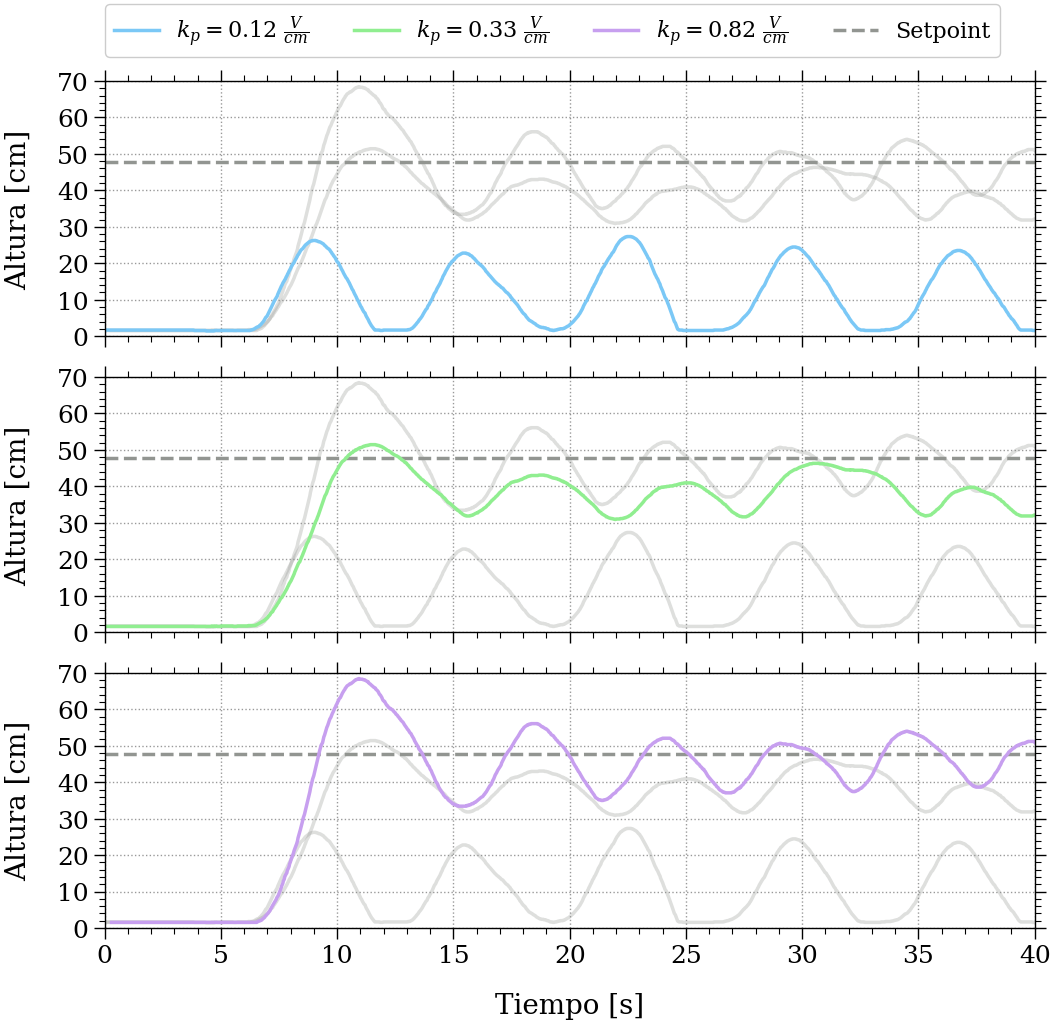

In [177]:
df = pd.read_csv(fr'..\Mediciones\Clase 3\PID\PID-2-0-0-barrido.csv')
t2 = df['Time'].values + 3.9
t2 = np.insert(t2, 0, 0)
h2 = px2d(df['Position'].values)
h2 = np.insert(h2, 0, h2[0])

df = pd.read_csv(fr'..\Mediciones\Clase 3\PID\PID-0.7-0-0-barrido.csv')
t07 = df['Time'].values + 0.1
h07 = px2d(df['Position'].values)

df = pd.read_csv(fr'..\Mediciones\Clase 2\crtl_P_Kp5min2.csv', header=None, names=['Time', 'Position', 'P'])
t5 = df['Time'].values - 1.8
h5 = px2d(df['Position'].values)*1.46 + h2[0]


fig, ax = plt.subplots(3, 1, sharex=True, figsize=(12, 11))
axtop, axmed, axbot = ax
axbot.set_xlabel('Tiempo [s]')

# Top
axtop.axhline(px2d(400), c='C9', ls='--')
axtop.plot(t5, h5, c='C9', alpha=0.3)
axtop.plot(t2, h2, c='C9', alpha=0.3)
axtop.plot(t07, h07, label=r'$k_p = 0.12 \ \frac{V}{cm}$', c='C1')

# Med

axmed.axhline(px2d(400), c='C9', ls='--')
axmed.plot(t07, h07,  c='C9', alpha=0.3)
axmed.plot(t5, h5, c='C9', alpha=0.3)
axmed.plot(t2, h2, label=r'$k_p = 0.33 \ \frac{V}{cm}$', c='C0')

# Bot

axbot.axhline(px2d(400), c='C9', ls='--')
axbot.plot(t07, h07,  c='C9', alpha=0.3)
axbot.plot(t2, h2, c='C9', alpha=0.3)
axbot.plot(t5, h5, label=r'$k_p = 0.82 \ \frac{V}{cm}$', c='C2')

plot_setpoint = axbot.axhline(px2d(400), c='C9', ls='--', label='Setpoint')

plt.subplots_adjust(hspace=0.16)
for ax_i in ax:
    ax_i.set_ylabel('Altura [cm]')
    ax_i.set_xlim(0, 40)
    ax_i.set_ylim(0, 70)
    # ax_i.legend()
    ax_i.set_yticks(range(0, 71, 10))
fig.legend(bbox_to_anchor=(0.88, 0.96), ncol=4, fontsize=16)
plot_setpoint.set_visible(False)
# fig.savefig('.\Figuras\P_3')
plt.show()

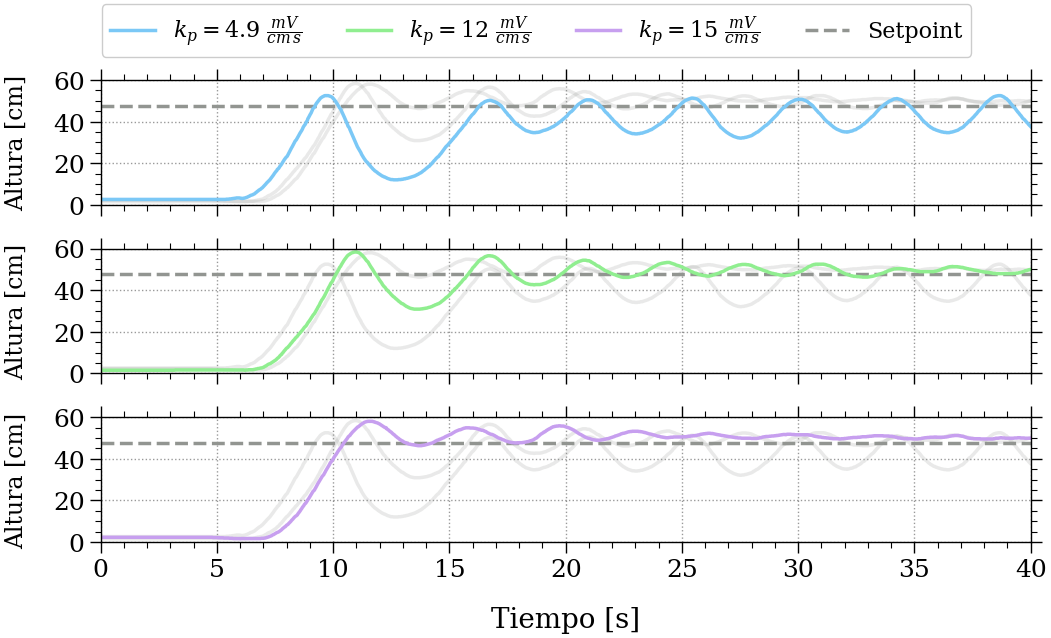

In [178]:
df = pd.read_csv(fr'..\Mediciones\Clase 3\PID\PID-2-0.03-0-barrido.csv')
tlow = df['Time'].values
hlow = px2d(df['Position'].values)

df = pd.read_csv(fr'..\Mediciones\Clase 3\PID\PID-2-0.07-0-barrido.csv')
tright = df['Time'].values
hright = px2d(df['Position'].values)

df = pd.read_csv(fr'..\Mediciones\Clase 3\PID\PID-2-0.09-0-barrido.csv')
thigh = df['Time'].values
hhigh = px2d(df['Position'].values)


fig, ax = plt.subplots(3, 1, sharex=True, figsize=(12, 6))
axtop, axmed, axbot = ax
axbot.set_xlabel('Tiempo [s]')

# Top
axtop.axhline(px2d(400), c='C9', ls='--')
axtop.plot(thigh, hhigh, c='C9', alpha=0.2)
axtop.plot(tright, hright, c='C9', alpha=0.2)
axtop.plot(tlow, hlow, label=r'$k_p = 4.9 \ \frac{mV}{cm \, s}$', c='C1')

# Med

axmed.axhline(px2d(400), c='C9', ls='--')
axmed.plot(tlow, hlow,  c='C9', alpha=0.2)
axmed.plot(thigh, hhigh, c='C9', alpha=0.2)
axmed.plot(tright, hright, label=r'$k_p = 12 \ \frac{mV}{cm \, s}$', c='C0')

# Bot

axbot.axhline(px2d(400), c='C9', ls='--')
axbot.plot(tright, hright,  c='C9', alpha=0.2)
axbot.plot(tlow, hlow, c='C9', alpha=0.2)
axbot.plot(thigh, hhigh, label=r'$k_p = 15 \ \frac{mV}{cm \, s}$', c='C2')

plot_setpoint = axbot.axhline(px2d(400), c='C9', ls='--', label='Setpoint')

plt.subplots_adjust(hspace=0.35)
for ax_i in ax:
    ax_i.set_ylabel('Altura [cm]', fontsize=17)
    ax_i.set_xlim(0, 40)
    ax_i.set_ylim(0, 60)
    # ax_i.legend()
    ax_i.set_yticks(range(0, 61, 20))
fig.legend(bbox_to_anchor=(0.8597, 1.025), ncol=4, fontsize=16)
plot_setpoint.set_visible(False)
# fig.savefig('.\Figuras\PI_3')
plt.show()

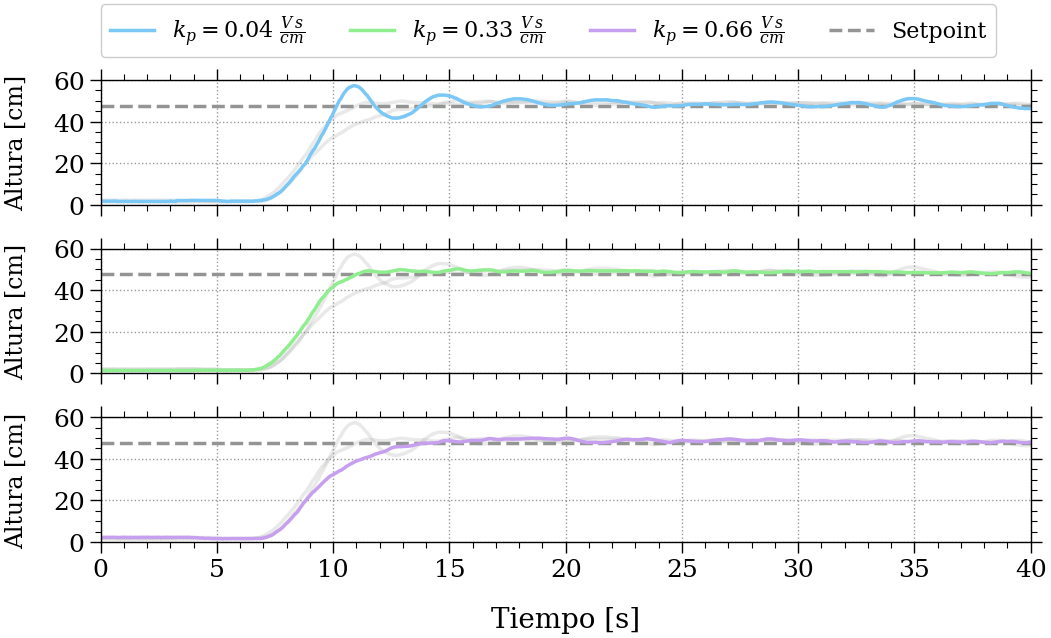

In [191]:
df = pd.read_csv(fr'..\Mediciones\Clase 3\PID\PID-2-0.07-0.25-barrido.csv')
tlow = df['Time'].values
hlow = px2d(df['Position'].values)

df = pd.read_csv(fr'..\Mediciones\Clase 3\PID\PID-2-0.07-2-barrido.csv')
tright = df['Time'].values
hright = px2d(df['Position'].values)

df = pd.read_csv(fr'..\Mediciones\Clase 3\PID\PID-2-0.07-4-barrido.csv')
thigh = df['Time'].values
hhigh = px2d(df['Position'].values)


fig, ax = plt.subplots(3, 1, sharex=True, figsize=(12, 6))
axtop, axmed, axbot = ax
axbot.set_xlabel('Tiempo [s]')

# Top
axtop.axhline(px2d(400), c='C9', ls='--')
axtop.plot(thigh, hhigh, c='C9', alpha=0.2)
axtop.plot(tright, hright, c='C9', alpha=0.2)
axtop.plot(tlow, hlow, label=r'$k_p = 0.04 \ \frac{V \, s}{cm}$', c='C1')

# Med

axmed.axhline(px2d(400), c='C9', ls='--')
axmed.plot(tlow, hlow,  c='C9', alpha=0.2)
axmed.plot(thigh, hhigh, c='C9', alpha=0.2)
axmed.plot(tright, hright, label=r'$k_p = 0.33 \ \frac{V \, s}{cm}$', c='C0')

# Bot

axbot.axhline(px2d(400), c='C9', ls='--')
axbot.plot(tright, hright,  c='C9', alpha=0.2)
axbot.plot(tlow, hlow, c='C9', alpha=0.2)
axbot.plot(thigh, hhigh, label=r'$k_p = 0.66 \ \frac{V \, s}{cm}$', c='C2')

plot_setpoint = axbot.axhline(px2d(400), c='C9', ls='--', label='Setpoint')

plt.subplots_adjust(hspace=0.35)
for ax_i in ax:
    ax_i.set_ylabel('Altura [cm]', fontsize=17)
    ax_i.set_xlim(0, 40)
    ax_i.set_ylim(0, 60)
    # ax_i.legend()
    ax_i.set_yticks(range(0, 61, 20))
fig.legend(bbox_to_anchor=(0.88, 1.025), ncol=4, fontsize=16)
plot_setpoint.set_visible(False)
# fig.savefig('.\Figuras\PID_3')
plt.show()